**State of Deep Learning (2020), in Python:**
- 2 most popular DL frameworks / libraries:
    - Tensorflow (Google) ~2015
        - Keras (Google) ~2015/16
    - PyTorch (Facebook) ~2016

As of 2020, Keras is now directly part of the tensorflow package,
- i.e. We recommend to ``import tensorflow.keras``

In [1]:
import tensorflow.keras

In [2]:
from sklearn.datasets import make_moons
#!pip install scikit-learn

import matplotlib.pyplot as plt

X, y = make_moons(n_samples=5000, noise=0.2, random_state=42)

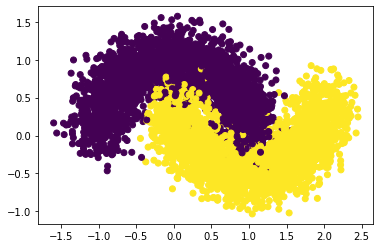

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
from tensorflow.keras import Sequential #tf terminology for Feed-Forward Network
from tensorflow.keras.layers import Dense #Fully-connected layers (normal layer of neurons)
from tensorflow.keras.layers import Activation

In [5]:
X[0].shape

(2,)

In [6]:
model = Sequential([
    Dense(4, input_shape=(2,)), #hardest part to get right
    #this means that each data point has 2 features / columns / dimensions
    # first 2 => 2 neurons, and the (2, ) means each data point has 2 dimensions
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid')  
])

- input shape is SUPER IMPORTANT. tells Keras what the input shape is, as a tuple. It is the shape of a SINGLE DATA POINT. The network doesn't care how many data points it receives (it's going to get different number of data points among trainig and testing, anyways)
- the dense layers get their biases automatically. Keras handles this for us. weights are also initialized automatically, unless, of course, you want to overwrite it with a hyperparameter.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
activation (Activation)      (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [8]:
#in Keras, there's an extra step:

in sklearn:
1. instantiate the model
2. fit the model

in keras:
1. instantiate the model
2. compile the model
3. fit the model

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#compiling the model basically translates our keras code into lower-level TensorFlow / C++

- the complicated step is conceptually very new. This is where it actually communicates with TensorFlow and creates what's called a 'computation graph' -- something that Keras needs to run the model.
- Keras is compiling our model into a very abstract form that is implemented in C++.
- include ``metrics = ['accuracy']`` to give you accuracy during the epoch

In [10]:
history = model.fit(X, y, epochs=50, batch_size=500, verbose=1)
#epochs -> iteration of backpropagation
#batch_size -> chunk size / sub-epoch

Epoch 1/50
10/10 [==============================] - 0s 858us/step - loss: 0.6900 - accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 0s 720us/step - loss: 0.6825 - accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.5002
Epoch 7/50
10/10 [==============================] - 0s 838us/step - loss: 0.6574 - accuracy: 0.5014
Epoch 8/50
10/10 [==============================] - 0s 663us/step - loss: 0.6529 - accuracy: 0.5160
Epoch 9/50
10/10 [==============================] - 0s 745us/step - loss: 0.6486 - accuracy: 0.5566
Epoch 10/50
10/10 [==============================] - 0s 640us/step - loss: 0.6444 - accuracy: 0.6032
Epoch 1

In [11]:
score = model.evaluate(X, y, batch_size=4)
print(score)
# Final Loss / Accuracy

1250/1250 [==============================] - 0s 392us/step - loss: 0.5052 - accuracy: 0.8040
[0.5051841735839844, 0.8040000200271606]


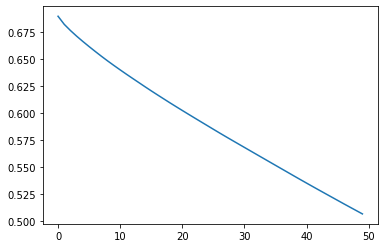

In [12]:
plt.plot(history.history['loss'])

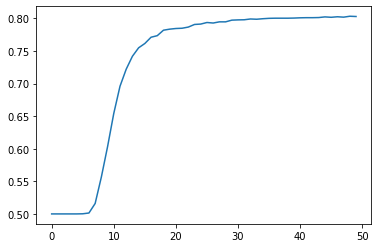

In [13]:
plt.plot(history.history['accuracy'])

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

---

### The MNIST dataset: Guiding principles:
- Flatten the X data to be an array of shape (N, 784).
- This means that each incoming data point into the network (i.e. input shape) should be shaped (784, )
- You will also have to one-hot encode the ylabels. You can use keras' to_categorical() function for this.
- This is a multi-class classification problem, so how many neurons should you have in the final layer? And which activation function should it be?
    - 10 neurons and Softmax activation

In [15]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

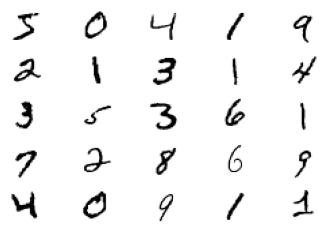

In [16]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [17]:
xtrain.shape

(60000, 28, 28)

What do the dimensions represent?
- 60,000 images
- each image has 28 rows (height)
- each image has 28 columns (width)

In [18]:
xtrain[0][0][0] #the first pixel of the first row of the first image

0

In [19]:
xtrain[0][14][14]

240

In [20]:
import pandas as pd

pd.DataFrame(xtrain.reshape(60000, 784))
#each image has 784 features
#each pixel is an independent features

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

"Simple" Machine Learning:
- Feature Engineering is everything
- Hyperparameter Optimization helped a little

"Deep" Learning / Neural Networks
- Hyperparameter Optimization is key
- ( a lot of the ) Feature Engineering is done for us.

---

What are the hyperparamters of Neural Networks?
- Number of layers
    - The more layers, the more "hidden features" the model learns
    - Too many layers > overfitting.
    - Also, see: ``Vanishing Gradient Problem``
- Loss Functions
    - in general, you choose a loss function based on the type of problem:
        - Regression: **MSE**
        - Binary Classification: **Log Loss / Binary Cross-Entropy**
        - MultiClass Classification: **Cross Entropy**
            - ^this is the one we want for MNIST
- Number of Neurons in each layer
    - More neurons, the more the model can learn / make more complicated decision boundaries
    - Too many can risk overfitting
- Activation Function
    - You have one activation function for a single layer.
    - But you can have different activation functions for different layers.
    - Functions:
        - Step Function
            - Primitive, not used in practice. Good for teaching
        - Sigmoid Function
            - If you have a sigmoid function as your last layer, you always use **log-loss / binary cross entropy** as your loss function.
            - If you use sigmoid function as your last layer, you are implying that the problem is binary classification.
            - Gives us a probability between 0.0 and 1.0
        - SoftMax Function
            - if you have a softmax function as your last layer, you always use **cross-entropy** as your loss function. Use of softmax in final layer implies that the problem is multi-class classification.
            - For MNIST problem, the last layer **MUST** have 10 Neurons, and it **MUST** be a Softmax activation.
        - Linear Function
            - Turn your Neural Network into a Regression Problem.
        - ReLU (Rectified Linear Unit)
            - very popular activation function for hidden layers.
            - trains very fast. Use it for hidden layers.
        - ELU
            - slight twist on ReLU
- Type of Layer
    - Dense / Fully-Connected Layers (i.e. Classic Feed-Forward Networks)
    - **Wednesday**: Convolutional Kernels
        - Image Recognition
    - **Thursday**: Recurrent Neural Networks
        - Time Series Analysis
        - NLP
- Optimizers
    - Use default!
    - Very active area of research is improving the backpropagation algorithm
    - Most popular: ``Adam``
    - See: ``Keras Optimizers``
- Weight Initialization
    - Another big active area of research
    - See: ``He``, ``Xavier``, ``Glorot``
    - Use the default!
- Batches and Epochs
    - Epochs: How many iterations you want your model to train
    - Batch Size: For this week, try batch sizes of ~500-5000

---

In [21]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
from tensorflow.keras.layers import Dropout

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

- Reshape the X data to (N, 784)
    - At least for Feed-Forward-Networks!

In [25]:
xtrain.shape

(60000, 28, 28)

In [26]:
xtrain = xtrain.reshape(60000, 784)

In [27]:
xtrain.shape

(60000, 784)

In [28]:
xtrain[0].shape

(784,)

In [29]:
ytrain.shape

(60000,)

In [30]:
ytrain = to_categorical(ytrain, num_classes=10)
#you'll need to one-hot-encode the labels for the model to understand

In [31]:
ytrain.shape

(60000, 10)

In [32]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Otherwise, start trying things out!

In [33]:
m = Sequential([
    Dense(60, input_shape=(784,)), #hardest part to get right/ Xtrain[0].shape
    #this means that each data point has 2 features / columns / dimensions
    # first 2 => 2 neurons, and the (2, ) means each data point has 2 dimensions
    Activation('relu'),
    Dense(20),
    Activation('relu'),
    Dense(10),
    Activation('softmax')  
])

In [34]:
m.compile(loss='CategoricalCrossentropy', metrics=['accuracy'])

In [35]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history = m.fit(xtrain, ytrain, epochs=100, batch_size=500, verbose=1, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 0s 3ms/step - loss: 6.2593 - accuracy: 0.3151 - val_loss: 1.5668 - val_accuracy: 0.4223
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 1.4708 - accuracy: 0.4679 - val_loss: 1.3096 - val_accuracy: 0.5092
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 1.2126 - accuracy: 0.5571 - val_loss: 1.0958 - val_accuracy: 0.6252
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 1.0183 - accuracy: 0.6326 - val_loss: 0.9919 - val_accuracy: 0.6514
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.9041 - accuracy: 0.6679 - val_loss: 0.8467 - val_accuracy: 0.7318
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.7629 - val_loss: 0.7540 - val_accuracy: 0.8103
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.8288 - val_loss: 0.6780 - val_accuracy: 0.8586
Epoch 8/100
9

In [36]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 60)                47100     
_________________________________________________________________
activation_2 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1220      
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 48,530
Trainable params: 48,530
Non-trainable params: 0
__________________________________________________

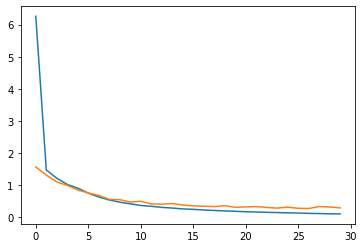

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

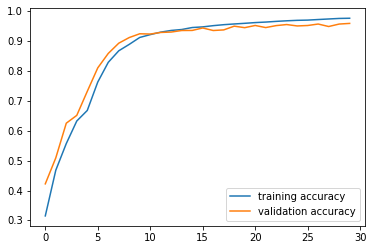

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [39]:
score = m.evaluate(xtrain, ytrain, batch_size=4)
print(score)
# Final Loss / Accuracy:

15000/15000 [==============================] - 11s 723us/step - loss: 0.1247 - accuracy: 0.9760
[0.12466903030872345, 0.9759500026702881]


Bonus Data Set:

In [40]:
from tensorflow.keras.datasets import fashion_mnist

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

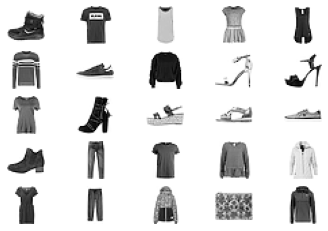

In [41]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

## Good starting points/ How to train good performing models that don't overfit

- Early Stopping
    - built-in callback function in Keras that will automatically stop training after validation performance starts to stagnate.
    - stop training at an earlier epoch before training and validation losses start to diverge.
- Larger Data Set (greater variety of data)
    - see: ``Keras Data Augmentation`` 
        - creates random rotations, shifts, changes in contrast, brightness
    - efficiently handles memory during training (i.e. only reads in a batch of images at a time in memory)
- Make the model simpler
    - fewer parameters, i.e. fewer neurons/ layers
    - reduce number of epochs
- Regularization
    - artificially inject bias into the model during training 
    - keras.regularizers.l1 (lasso)
    - keras.regularizers.l2 (ridge)
    - these are arguments that you pass in Dense(regularization = keras.regularizers.l2)
    - One of the most popular regularization techniques: **DropOut**
        - In DropOut, random neurons are excluded from the training process. The remaining neurons have to perform regardless. This builds robustness into the network, because it avoids over-specialization of single neurons. When using the trained networks for predictions, all neurons participate.
- Batch Normalization
    - Standard Scaling in between layers of the network
    - Shown to improve performance, also has slight regularization effects